In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats as stats
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor


from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

%matplotlib inline

In [59]:
df_leaderboard = pd.DataFrame(pd.read_csv('./Data/dsi-us-5-project-2-regression-challenge-publicleaderboard2.csv'))

In [60]:
df_leaderboard.head(10)

,TeamId,TeamName,SubmissionDate,Score
0,1969333,Joe Dorfman,2018-08-08 20:10:12,88253.23405
1,1969453,Foo Bar,2018-08-08 21:00:31,88253.23405
2,1975412,Sam Stack,2018-08-14 20:53:04,76985.22778
3,1982491,Scott Wright,2018-08-15 16:48:56,80306.06470
4,1990744,Brian Collins,2018-08-15 16:49:44,43404.98491
5,1984247,Jordan Nelson,2018-08-15 16:58:52,59443.03503
6,1984247,Jordan Nelson,2018-08-15 17:14:40,48874.52530
7,1975642,Scott Lingor,2018-08-15 20:12:02,67622.61575
8,1975642,Scott Lingor,2018-08-15 20:15:52,57095.90472
9,1975642,Scott Lingor,2018-08-15 20:28:30,44580.70103


In [61]:
df_leaderboard.describe()

,TeamId,Score
count,4.450000e+02,4.450000e+02
mean,1.986940e+06,1.590329e+17
std,9.829847e+03,3.354064e+18
min,1.969333e+06,2.438117e+04
25%,1.977844e+06,3.641438e+04
50%,1.984408e+06,4.099480e+04
75%,1.993803e+06,4.614906e+04
max,2.018877e+06,7.075410e+19


In [34]:
import datetime as dt

In [35]:
dt.date(2018,8,7)

datetime.date(2018, 8, 7)

In [62]:
df_cleaned = df_leaderboard[(df_leaderboard.Score < 10e6)]
df_cleaned['SubmissionDate'] = pd.to_datetime(df_cleaned['SubmissionDate'])
df_cleaned['DaysFromStart'] = (df_cleaned['SubmissionDate'].dt.date- dt.date(2018,8,7))
df_cleaned['DaysFromStart'] = df_cleaned['DaysFromStart'].dt.days
df_cleaned.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

TeamId                     int64
TeamName                  object
SubmissionDate    datetime64[ns]
Score                    float64
DaysFromStart              int64
dtype: object

In [63]:
X = df_cleaned.loc[:,['DaysFromStart']]
y= df_cleaned.Score

In [64]:
type(X)

pandas.core.frame.DataFrame

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


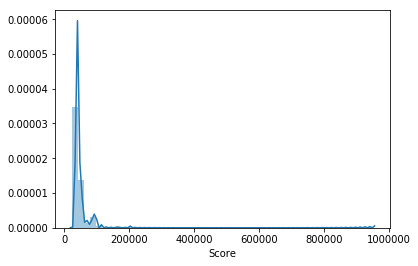

In [65]:
sns.distplot(df_cleaned.Score)

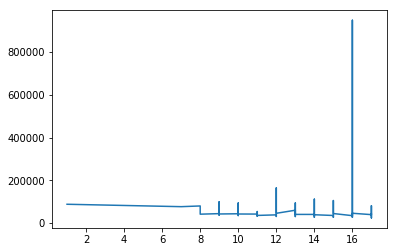

In [66]:
plt.plot(df_cleaned.DaysFromStart, df_cleaned.Score)

## KNearest

In [41]:
'''for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X, y)
    print('    ', i, knn.score(X, y))'''

"for i in range(1,10):\n    knn = KNeighborsRegressor(n_neighbors=i)\n    knn.fit(X, y)\n    print('    ', i, knn.score(X, y))"

In [42]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X, y)
knn.score(X,y)

-0.0026249438924226265

In [43]:
'best neighbor count is 5'

'best neighbor count is 5'

In [44]:
df_neighbors = pd.DataFrame(knn.predict(X), columns=['vals'])

In [45]:
ks_list = sorted(list(df_neighbors.vals.value_counts().index))

In [46]:
ks_list

[36006.0502425,
 37152.471141250004,
 37538.4019025,
 38523.320751249994,
 40173.28043125,
 40849.5509725,
 42536.8795275,
 42693.4115675,
 48428.244940000004,
 55682.95556375,
 59789.1324025,
 69142.86519625]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


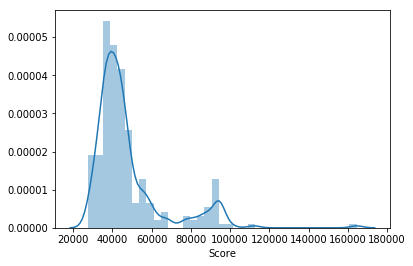

In [22]:
sns.distplot(df_cleaned.Score)

[Text(0,0,'35661.163235'),
 Text(0,0,'40849.5509725'),
 Text(0,0,'48428.244940000004'),
 Text(0,0,'37087.93239375'),
 Text(0,0,'42758.02947375'),
 Text(0,0,'55682.95556375'),
 Text(0,0,'42536.8795275'),
 Text(0,0,'69142.86519625'),
 Text(0,0,'59789.1324025')]

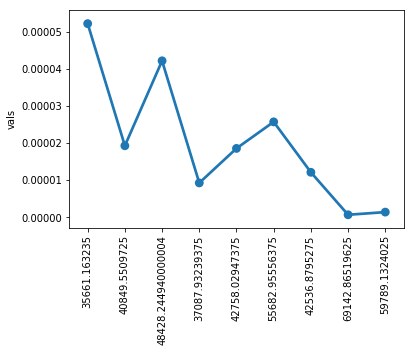

In [23]:
g=sns.pointplot(df_neighbors.vals.value_counts().index,
                df_neighbors.vals.value_counts()*(.00005/70))
g.set_xticklabels(labels=df_neighbors.vals.value_counts().index,rotation=90)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


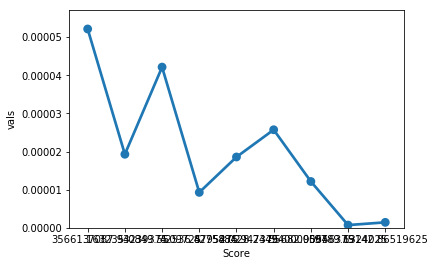

In [24]:
plt.figure
fig, ax = plt.subplots()
sns.pointplot(df_neighbors.vals.value_counts().index,
                df_neighbors.vals.value_counts()*(.00005/70), ax=ax)
sns.distplot(df_cleaned.Score, ax=ax)


## let's try this - kmeans

In [25]:
#https://stackoverflow.com/questions/37374983/get-data-points-from-seaborn-distplot

In [67]:
from sklearn.cluster import KMeans

In [74]:
short_data = X
short_data['Score'] = y

In [104]:
checkn = 7
kmm = KMeans(n_clusters=checkn, random_state=0).fit(short_data)
kmm_model=KMeans(n_clusters=checkn, random_state=0)
kmm_model.fit(short_data)


k_means_list = [kmm.cluster_centers_[i][1] for i in range(checkn)]
k_means_list = sorted(k_means_list)
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

k_means_list = sorted(k_means_list)

k_means_dict = {}
for i in range(len(k_means_list)):
    k_means_dict[k_means_list[i]] = alphabet[i]
k_means_dict

{30142.37713920635: 'a',
 37421.630686666664: 'b',
 44100.178925314685: 'c',
 58366.21547257143: 'd',
 91511.81981617647: 'e',
 183499.104445: 'f',
 948830.62361: 'g'}

In [105]:
_temp_list = [abs(45000 - i) for i in k_means_dict.keys()]
k_means_dict[k_means_list[_temp_list.index(min(_temp_list))]]


'c'

In [106]:
def get_k(number):
    _temp_list = [abs(number - i) for i in k_means_dict.keys()]
    return k_means_dict[k_means_list[_temp_list.index(min(_temp_list))]]
    

In [107]:
get_k(30000)

'a'

In [108]:
short_data['k_cat'] = short_data.Score

short_data['k_cat'] =short_data['k_cat'].apply(lambda x: get_k(x))

In [110]:
df_graphable = pd.concat([short_data, pd.get_dummies(short_data['k_cat'])], axis=1)

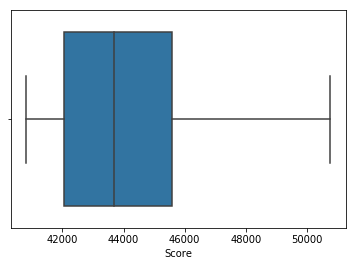

In [111]:
sns.boxplot(df_graphable[df_graphable.c==1]['Score'])

In [112]:
w=.00002
box_a = 1
dist_a = .5
wli = [0,100]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


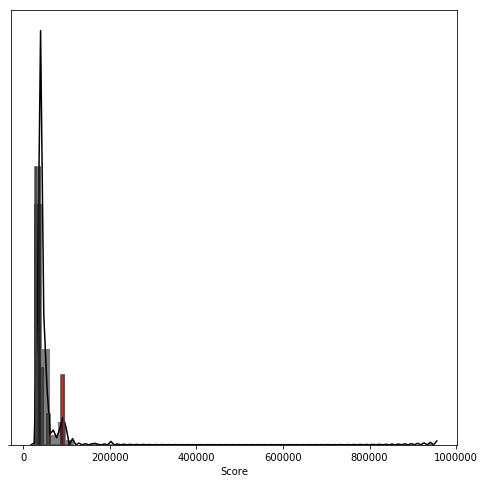

In [113]:
plt.figure
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(df_graphable[df_graphable.a==1]['Score'], whis=wli, showfliers=False, showcaps=False,width=w*4, ax=ax, color='blue', boxprops=dict(alpha=box_a))
sns.boxplot(df_graphable[df_graphable.b==1]['Score'], whis=wli,showfliers=False, showcaps=False,width=w*4,ax=ax, color='green', boxprops=dict(alpha=box_a))
sns.boxplot(df_graphable[df_graphable.c==1]['Score'], whis=wli,showfliers=False, showcaps=False,width=w*1.1,ax=ax, color='yellow', boxprops=dict(alpha=box_a))
sns.boxplot(df_graphable[df_graphable.d==1]['Score'], whis=wli,showfliers=False, showcaps=False,width=w*.45,ax=ax, color='orange',boxprops=dict(alpha=box_a))
sns.boxplot(df_graphable[df_graphable.e==1]['Score'], whis=wli,showfliers=False,showcaps=False, width=w,ax=ax, color='red', boxprops=dict(alpha=box_a)) 
sns.distplot(df_graphable['Score'], color='black', ax=ax,hist_kws=dict(alpha=dist_a ))

In [115]:
fig.savefig('./test_output2.jpeg')

In [116]:
%pwd

'C:\\Users\\conor\\OneDrive\\Desktop\\ReposGoHere\\GARepos\\My_Modules'

In [117]:
print('   ', df_graphable[df_graphable.a==1]['Score'].min())
print('   ', df_graphable[df_graphable.a==1]['Score'].max())
print('   ', df_graphable[df_graphable.b==1]['Score'].min())

    24381.16895
    33660.11748
    33876.472010000005


In [118]:
df_graphable[['a', 'b']]

,a,b
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [119]:
df_graphable.columns

Index(['DaysFromStart', 'Score', 'k_cat', 'a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

In [120]:
df_temp = df_graphable.groupby(['k_cat']).mean()

In [121]:
df_temp['k_catz'] = df_temp.index.values

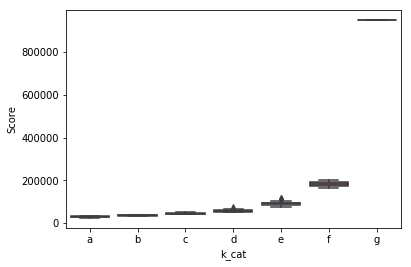

In [122]:
sns.boxplot(x='k_cat', y='Score', data=df_graphable.sort_values(by='Score'))

In [129]:
df_graphable.loc[:, ['DaysFromStart', 'Score', 'k_cat', 'a', 'b', 'c', 'd', 'e', 'f']].to_csv('./Data/CategorizedData3.csv')

In [124]:
%pwd

'C:\\Users\\conor\\OneDrive\\Desktop\\ReposGoHere\\GARepos\\My_Modules'